<a href="https://colab.research.google.com/github/BAHAMLAOUHI/Clustering-Approach-to-High-Dimensional-Data/blob/main/EDA_Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



*   the vast amounts of data that banks possess regarding their customers and transaction histories
*   the necessity for banks to segment these large datasets into smaller clusters to analyze customer behavior effectively and optimize service offerings
# Problematique
*   traditional segmentation methods, such as k-means, may not adequately capture the complexities of banking data, prompting the need for more advanced machine learning techniques to improve customer profiling and targeting.



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('client.csv')

In [ ]:
df.head()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0


# Dataset description
**X1:** Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.

**X2:** Gender (1 = male; 2 = female).

**X3:** Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).

**X4:** Marital status (1 = married; 2 = single; 3 = others).
**X5: **Age (year).

**X6 - X11:** History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.

**X12-X17:** Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005.

**X18-X23:** Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005.

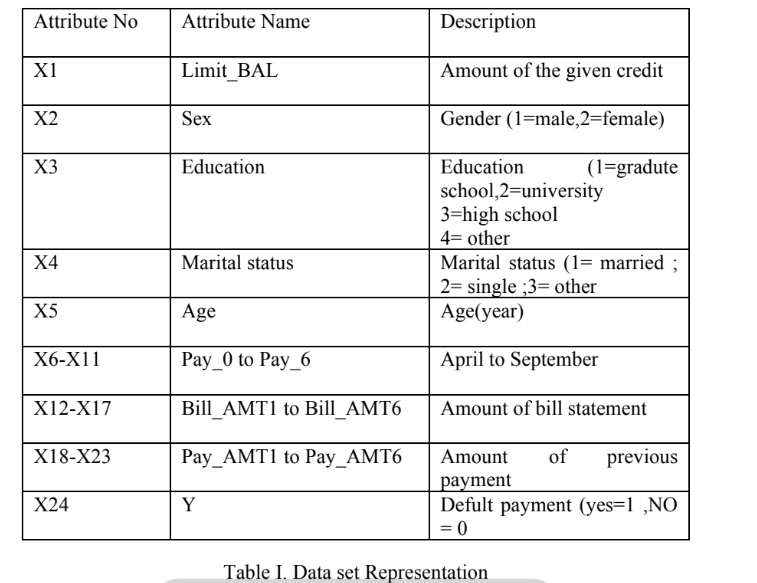

In [ ]:
df.columns

Index(['Unnamed: 0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9',
       'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19',
       'X20', 'X21', 'X22', 'X23', 'Y'],
      dtype='object')

In [ ]:
df = df.drop(index=0)

In [ ]:
df.head()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [ ]:
df.shape

(30000, 25)

we tried to set the names of our features

In [ ]:
new_column_names = {
    'Unnamed: 0': 'Index',
    'X1': 'Limit_BAL',
    'X2': 'Sex',
    'X3': 'Education',
    'X4': 'Marital_status',
    'X5': 'Age',
    'X6': 'Pay_0',
    'X7': 'Pay_1',
    'X8': 'Pay_2',
    'X9': 'Pay_3',
    'X10': 'Pay_4',
    'X11': 'Pay_5',
    'X12': 'Bill_AMT1',
    'X13': 'Bill_AMT2',
    'X14': 'Bill_AMT3',
    'X15': 'Bill_AMT4',
    'X16': 'Bill_AMT5',
    'X17': 'Bill_AMT6',
    'X18': 'Pay_AMT1',
    'X19': 'Pay_AMT2',
    'X20': 'Pay_AMT3',
    'X21': 'Pay_AMT4',
    'X22': 'Pay_AMT5',
    'X23': 'Pay_AMT6',
    'X24': 'Y'
}

df = df.rename(columns=new_column_names)


In [ ]:
df.columns

Index(['Index', 'Limit_BAL', 'Sex', 'Education', 'Marital_status', 'Age',
       'Pay_0', 'Pay_1', 'Pay_2', 'Pay_3', 'Pay_4', 'Pay_5', 'Bill_AMT1',
       'Bill_AMT2', 'Bill_AMT3', 'Bill_AMT4', 'Bill_AMT5', 'Bill_AMT6',
       'Pay_AMT1', 'Pay_AMT2', 'Pay_AMT3', 'Pay_AMT4', 'Pay_AMT5', 'Pay_AMT6',
       'Y'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 1 to 30000
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Index           30000 non-null  object
 1   Limit_BAL       30000 non-null  object
 2   Sex             30000 non-null  object
 3   Education       30000 non-null  object
 4   Marital_status  30000 non-null  object
 5   Age             30000 non-null  object
 6   Pay_0           30000 non-null  object
 7   Pay_1           30000 non-null  object
 8   Pay_2           30000 non-null  object
 9   Pay_3           30000 non-null  object
 10  Pay_4           30000 non-null  object
 11  Pay_5           30000 non-null  object
 12  Bill_AMT1       30000 non-null  object
 13  Bill_AMT2       30000 non-null  object
 14  Bill_AMT3       30000 non-null  object
 15  Bill_AMT4       30000 non-null  object
 16  Bill_AMT5       30000 non-null  object
 17  Bill_AMT6       30000 non-null  object
 18  Pay_AM

Now, we convert the type of our data from string to integer.

In [ ]:
for col in df.columns:
    df[col] = df[col].astype(int)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 1 to 30000
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Index           30000 non-null  int64
 1   Limit_BAL       30000 non-null  int64
 2   Sex             30000 non-null  int64
 3   Education       30000 non-null  int64
 4   Marital_status  30000 non-null  int64
 5   Age             30000 non-null  int64
 6   Pay_0           30000 non-null  int64
 7   Pay_1           30000 non-null  int64
 8   Pay_2           30000 non-null  int64
 9   Pay_3           30000 non-null  int64
 10  Pay_4           30000 non-null  int64
 11  Pay_5           30000 non-null  int64
 12  Bill_AMT1       30000 non-null  int64
 13  Bill_AMT2       30000 non-null  int64
 14  Bill_AMT3       30000 non-null  int64
 15  Bill_AMT4       30000 non-null  int64
 16  Bill_AMT5       30000 non-null  int64
 17  Bill_AMT6       30000 non-null  int64
 18  Pay_AMT1        30000 non-

In [ ]:
df.head()

,Index,Limit_BAL,Sex,Education,Marital_status,Age,Pay_0,Pay_1,Pay_2,Pay_3,...,Bill_AMT4,Bill_AMT5,Bill_AMT6,Pay_AMT1,Pay_AMT2,Pay_AMT3,Pay_AMT4,Pay_AMT5,Pay_AMT6,Y
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


# Data PreProcessing

In [ ]:
# Check for duplicate rows
duplicate_rows = df[df.duplicated()]
duplicate_rows


,Index,Limit_BAL,Sex,Education,Marital_status,Age,Pay_0,Pay_1,Pay_2,Pay_3,...,Bill_AMT4,Bill_AMT5,Bill_AMT6,Pay_AMT1,Pay_AMT2,Pay_AMT3,Pay_AMT4,Pay_AMT5,Pay_AMT6,Y


There is no duplicate rows in our dataset

In [ ]:
# Check for missing values
missing_values = df.isnull().sum()
print("\nMissing Values per column:")
print(missing_values)


Missing Values per column:
Index             0
Limit_BAL         0
Sex               0
Education         0
Marital_status    0
Age               0
Pay_0             0
Pay_1             0
Pay_2             0
Pay_3             0
Pay_4             0
Pay_5             0
Bill_AMT1         0
Bill_AMT2         0
Bill_AMT3         0
Bill_AMT4         0
Bill_AMT5         0
Bill_AMT6         0
Pay_AMT1          0
Pay_AMT2          0
Pay_AMT3          0
Pay_AMT4          0
Pay_AMT5          0
Pay_AMT6          0
Y                 0
dtype: int64


There is no missing values in our dataset

In [ ]:
df.describe()

,Index,Limit_BAL,Sex,Education,Marital_status,Age,Pay_0,Pay_1,Pay_2,Pay_3,...,Bill_AMT4,Bill_AMT5,Bill_AMT6,Pay_AMT1,Pay_AMT2,Pay_AMT3,Pay_AMT4,Pay_AMT5,Pay_AMT6,Y
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


# Expploration of categorical Features :

In [ ]:
    df['Sex'].value_counts()

,count
Sex,
2,18112
1,11888


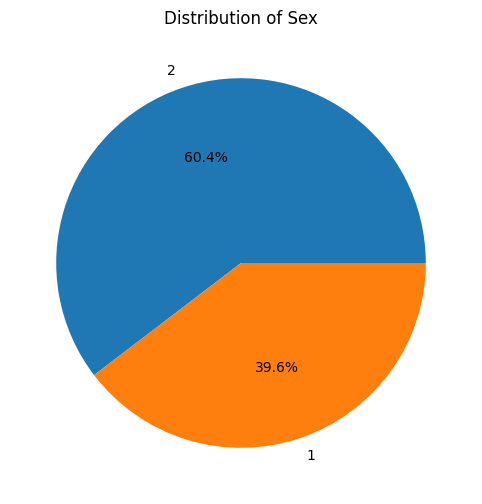

In [ ]:
plt.figure(figsize=(8, 6))
df['Sex'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of Sex')
plt.ylabel('')
plt.show()

There is more males than females

In [ ]:
df['Education'].value_counts()

,count
Education,
2,14030
1,10585
3,4917
5,280
4,123
6,51
0,14


Most of the customers are in Univerity

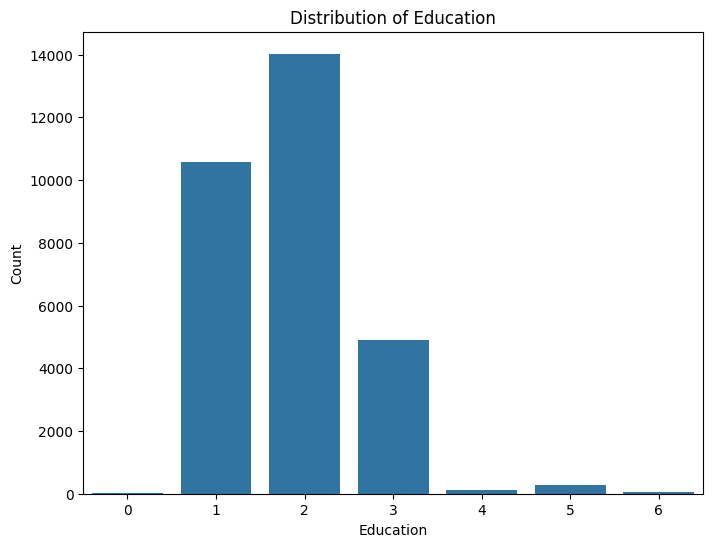

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Education', data=df)
plt.title('Distribution of Education')
plt.xlabel('Education')
plt.ylabel('Count')
plt.show()

In [ ]:
initial_rows = len(df)

df = df[df['Education'] != 0]

final_rows = len(df)

deleted_rows = initial_rows - final_rows

print(f"{deleted_rows} rows deleted.")

14 rows deleted.


In our case there is no information about "0" in Education, we can delete the samples with "0" in Eudcation ( only 14 Samples)

In [ ]:
df['Marital_status'].value_counts()

,count
Marital_status,
2,15954
1,13655
3,323
0,54


Most of the Customers are singles

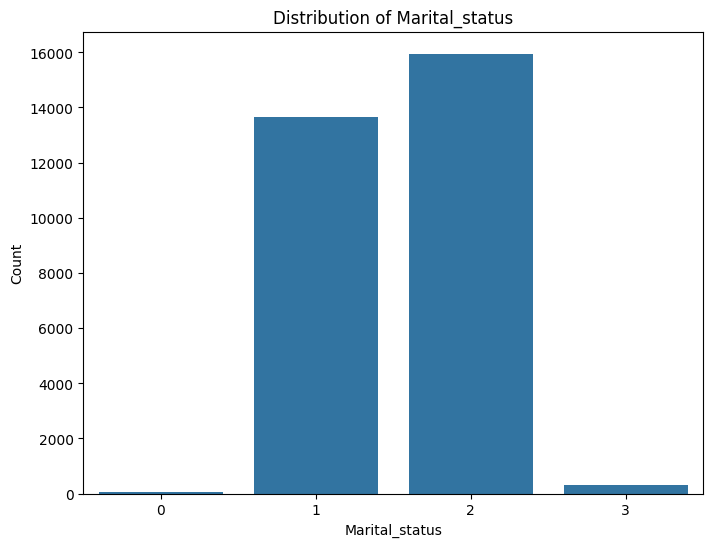

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Marital_status', data=df)
plt.title('Distribution of Marital_status')
plt.xlabel('Marital_status')
plt.ylabel('Count')
plt.show()

In [ ]:
initial_rows = len(df)

df = df[df['Marital_status'] != 0]

final_rows = len(df)

deleted_rows = initial_rows - final_rows

print(f"{deleted_rows} rows deleted.")

54 rows deleted.


Same for the marital status : "0" is not defined and (54 rows are with none defined.So, for better classification tasks these values could be outliers and it is better to get rid of them)

In [ ]:
df['Pay_0'].value_counts()

,count
Pay_0,
0,14713
-1,5667
1,3678
-2,2749
2,2663
3,322
4,76
5,25
8,19


In [ ]:
df['Pay_1'].value_counts()

,count
Pay_1,
0,15704
-1,6029
2,3919
-2,3770
3,326
4,98
1,28
5,25
7,20


In [ ]:
df['Pay_2'].value_counts()

,count
Pay_2,
0,15743
-1,5918
-2,4070
2,3809
3,238
4,76
7,27
6,23
5,21


In [ ]:
df['Pay_3'].value_counts()


,count
Pay_3,
0,16433
-1,5667
-2,4332
2,3149
3,180
4,69
7,58
5,35
6,5


In [ ]:
df['Pay_4'].value_counts()

,count
Pay_4,
0,16919
-1,5521
-2,4530
2,2621
3,177
4,84
7,58
5,17
6,4


In [ ]:
df['Pay_5'].value_counts()

,count
Pay_5,
0,16264
-1,5719
-2,4877
2,2760
3,183
4,49
7,46
6,19
5,13


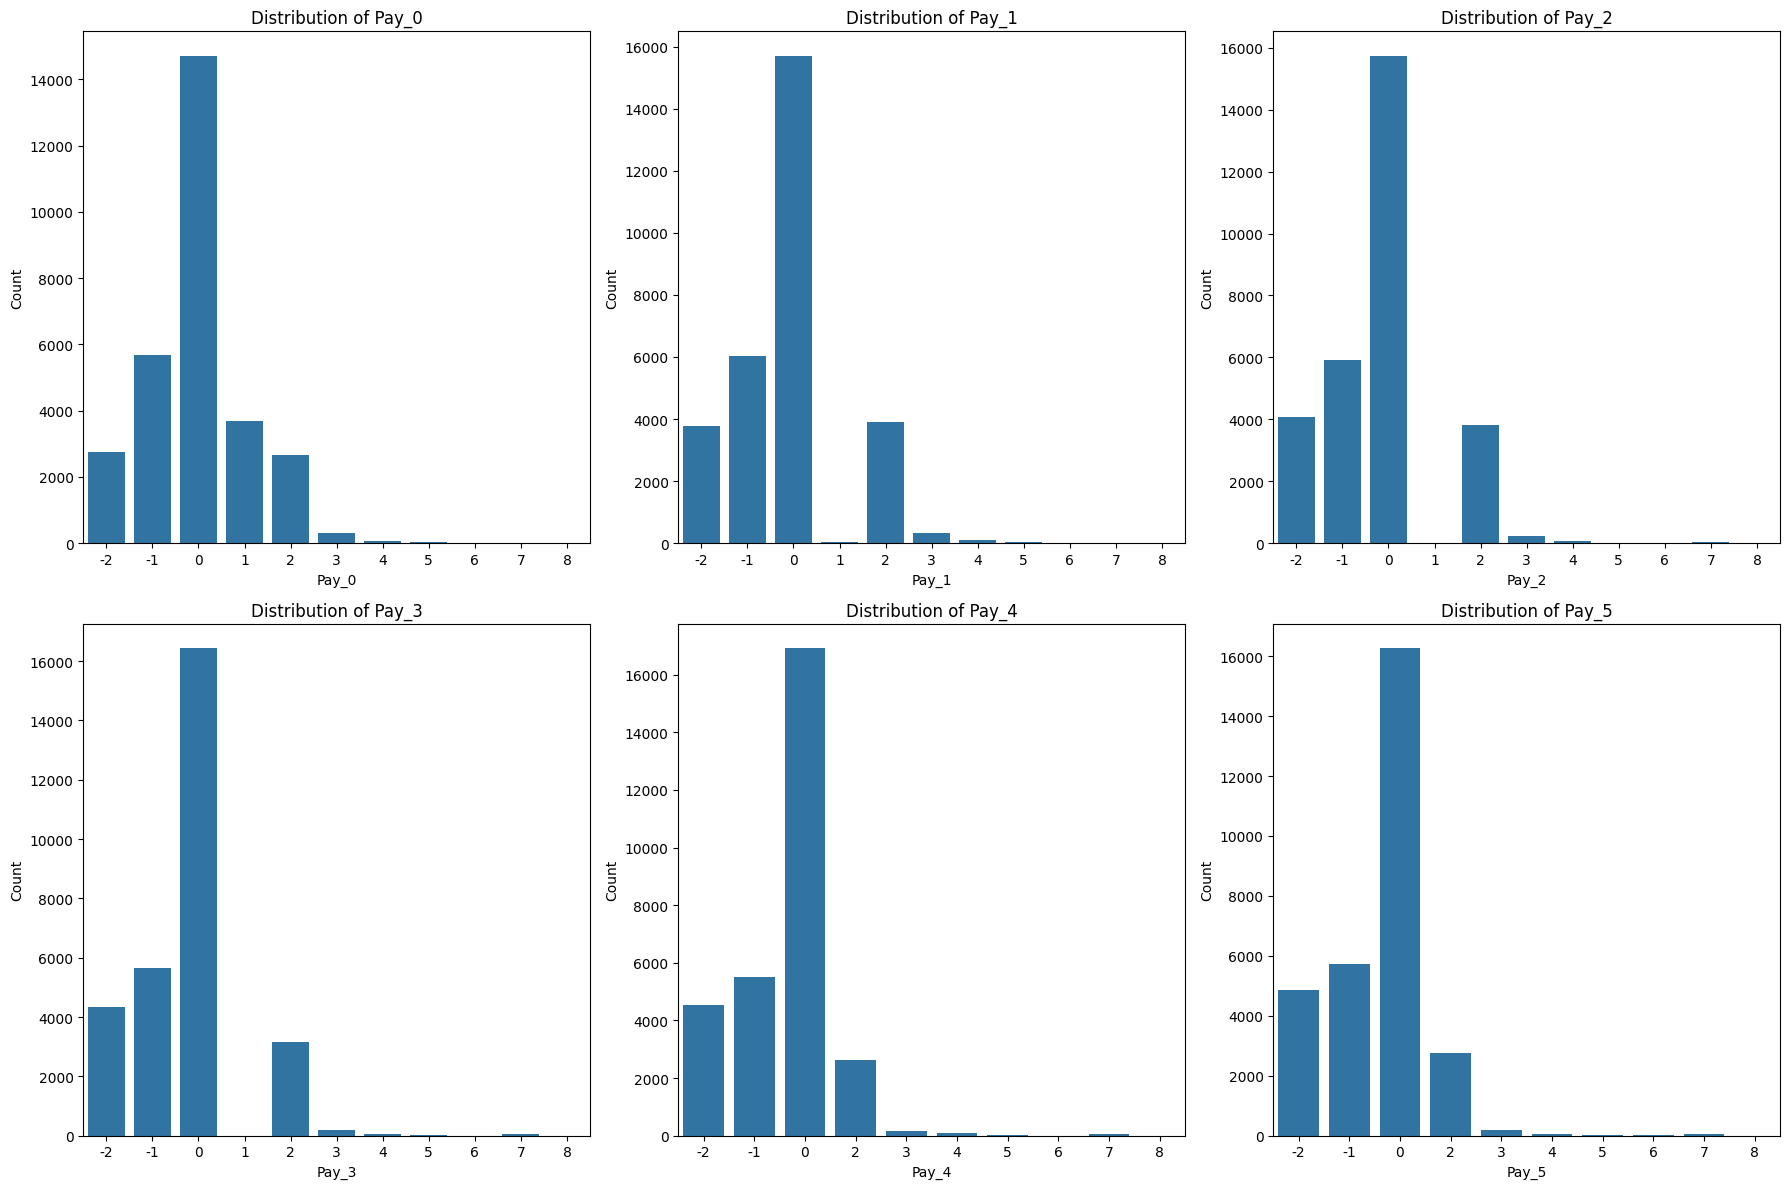

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.ravel()

for i, col in enumerate(["Pay_0", "Pay_1", "Pay_2", "Pay_3", "Pay_4", "Pay_5"]):
    sns.countplot(x=col, data=df, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')

plt.tight_layout()
plt.show()

Most individuals do not default or delay payments significantly, as seen by the dominance of values -1 and 0.

Payment delays beyond three months are rare, indicating relatively good financial discipline or creditworthiness among the population.

However, there is a small subset of individuals with significant delays (values 7 to 9), which could be indicative of severe financial distress.

# Exploration of the numerical features :

In [ ]:
df['Age'].value_counts()

,count
Age,
29,1604
27,1475
28,1407
30,1391
26,1253
31,1213
25,1186
34,1160
32,1157


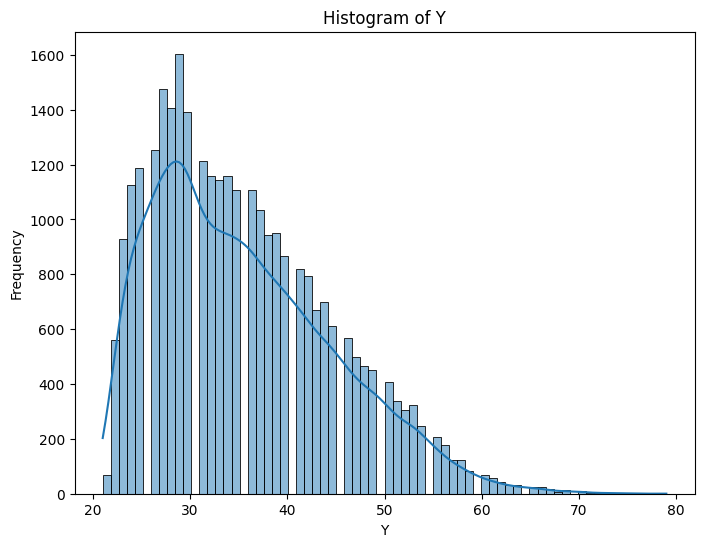

In [ ]:
    plt.figure(figsize=(8, 6))
    sns.histplot(df["Age"], kde=True)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

The dataset is likely centered around working-age adults, with a significant representation of individuals in their 20s and 30s.

The right-skewed nature suggests that older individuals (above 50-60 years) form a smaller proportion of the population.

In [ ]:
df['Limit_BAL'].value_counts()

,count
Limit_BAL,
50000,3357
20000,1973
30000,1608
80000,1562
200000,1519
...,...
730000,2
1000000,1
327680,1


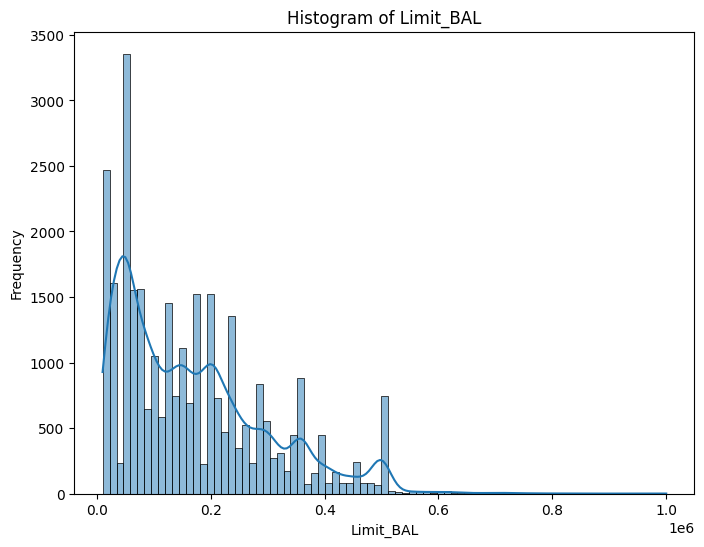

In [ ]:
    plt.figure(figsize=(8, 6))
    sns.histplot(df["Limit_BAL"], kde=True)
    plt.title(f'Histogram of {"Limit_BAL"}')
    plt.xlabel("Limit_BAL")
    plt.ylabel('Frequency')
    plt.show()

The dataset is likely centered around ow limit Balance, with a significant representation around 0.1 le6.

The right-skewed nature suggests that higher limit_balance (above 0.2-0.3 le6) form a smaller proportion.

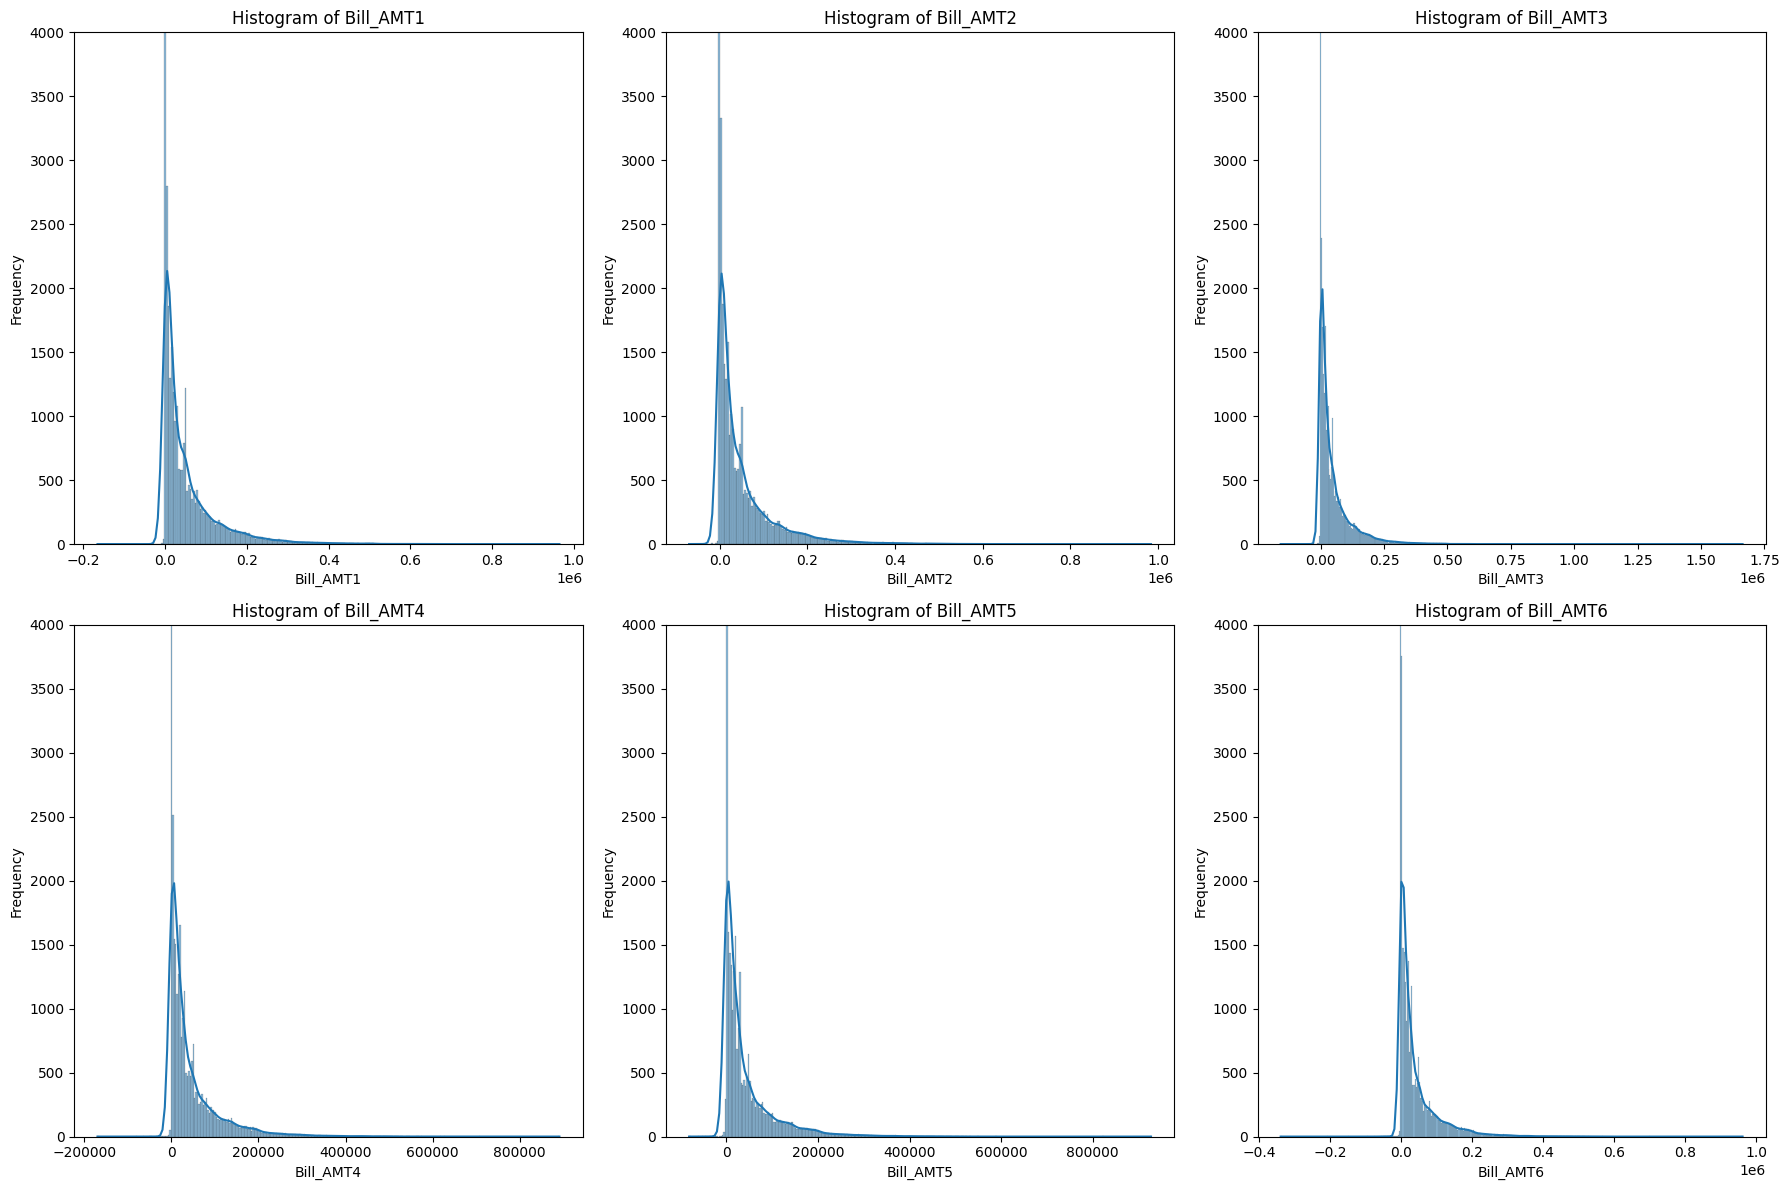

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.ravel()

y_limits = (0,4000)
for i, col in enumerate(["Bill_AMT1", "Bill_AMT2", "Bill_AMT3", "Bill_AMT4", "Bill_AMT5", "Bill_AMT6"]):
    sns.histplot(df[col], kde=True, ax=axes[i])
    axes[i].set_title(f'Histogram of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')
    axes[i].set_ylim(y_limits)


plt.tight_layout()
plt.show()

Most data points are concentrated near the lower end of the range.

Some negative values exist, possibly due to credits, refunds...

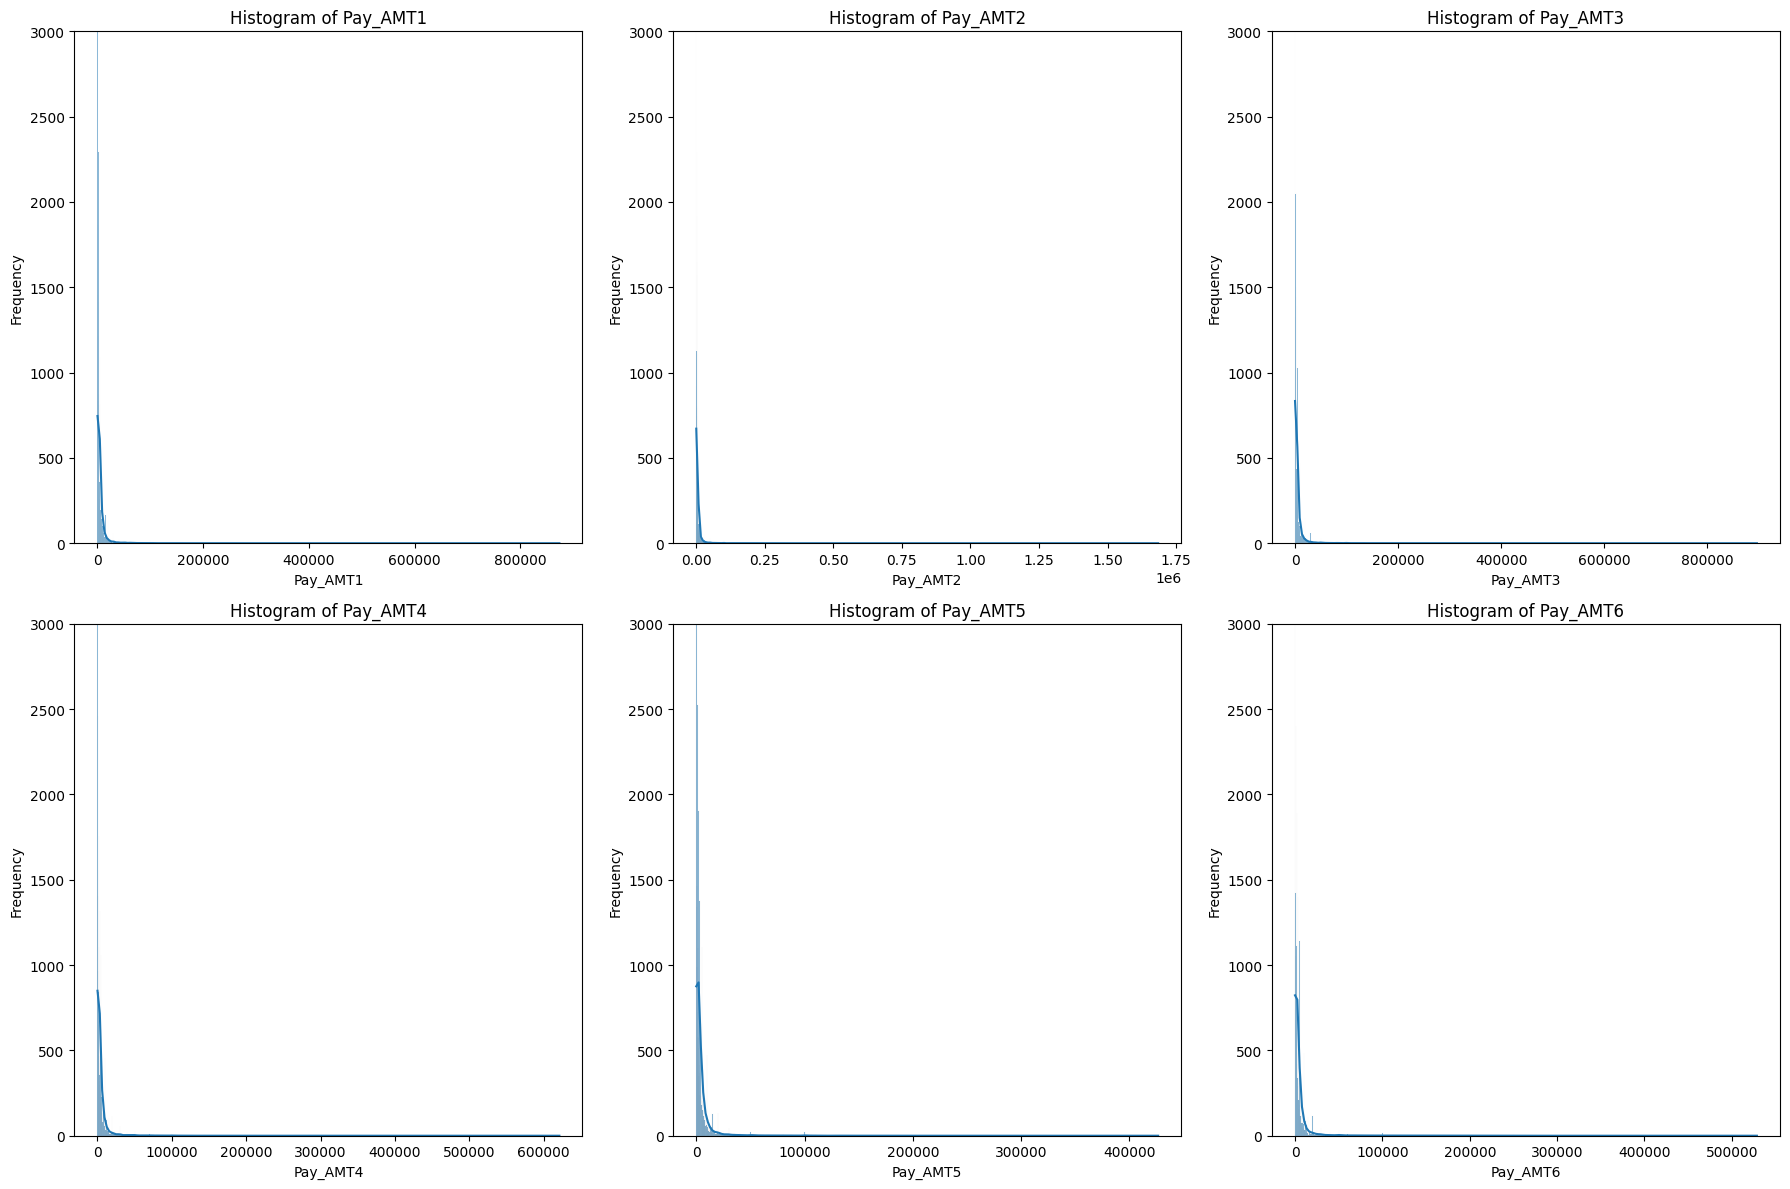

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.ravel()
y_limits = (0,3000)

for i, col in enumerate(["Pay_AMT1", "Pay_AMT2", "Pay_AMT3", "Pay_AMT4", "Pay_AMT5", "Pay_AMT6"]):
    sns.histplot(df[col], kde=True, ax=axes[i])
    axes[i].set_title(f'Histogram of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')
    axes[i].set_ylim(y_limits)


plt.tight_layout()
plt.show()

Most individuals made relatively small payments, as shown by
the right-skewed distribution.


In [ ]:
df['Y'].value_counts()

,count
Y,
0,23301
1,6631


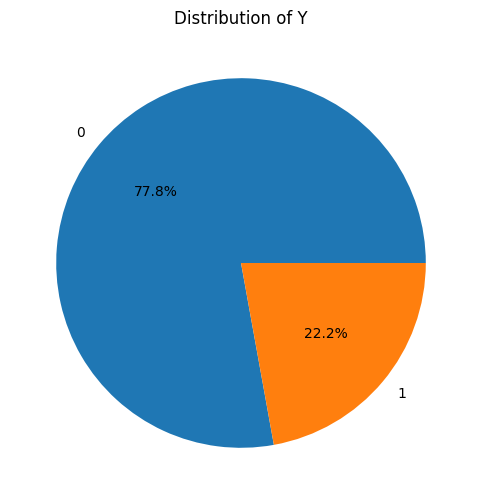

In [ ]:

plt.figure(figsize=(8, 6))
df['Y'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of Y')
plt.ylabel('')
plt.show()

Most of the Cutomers have default payments

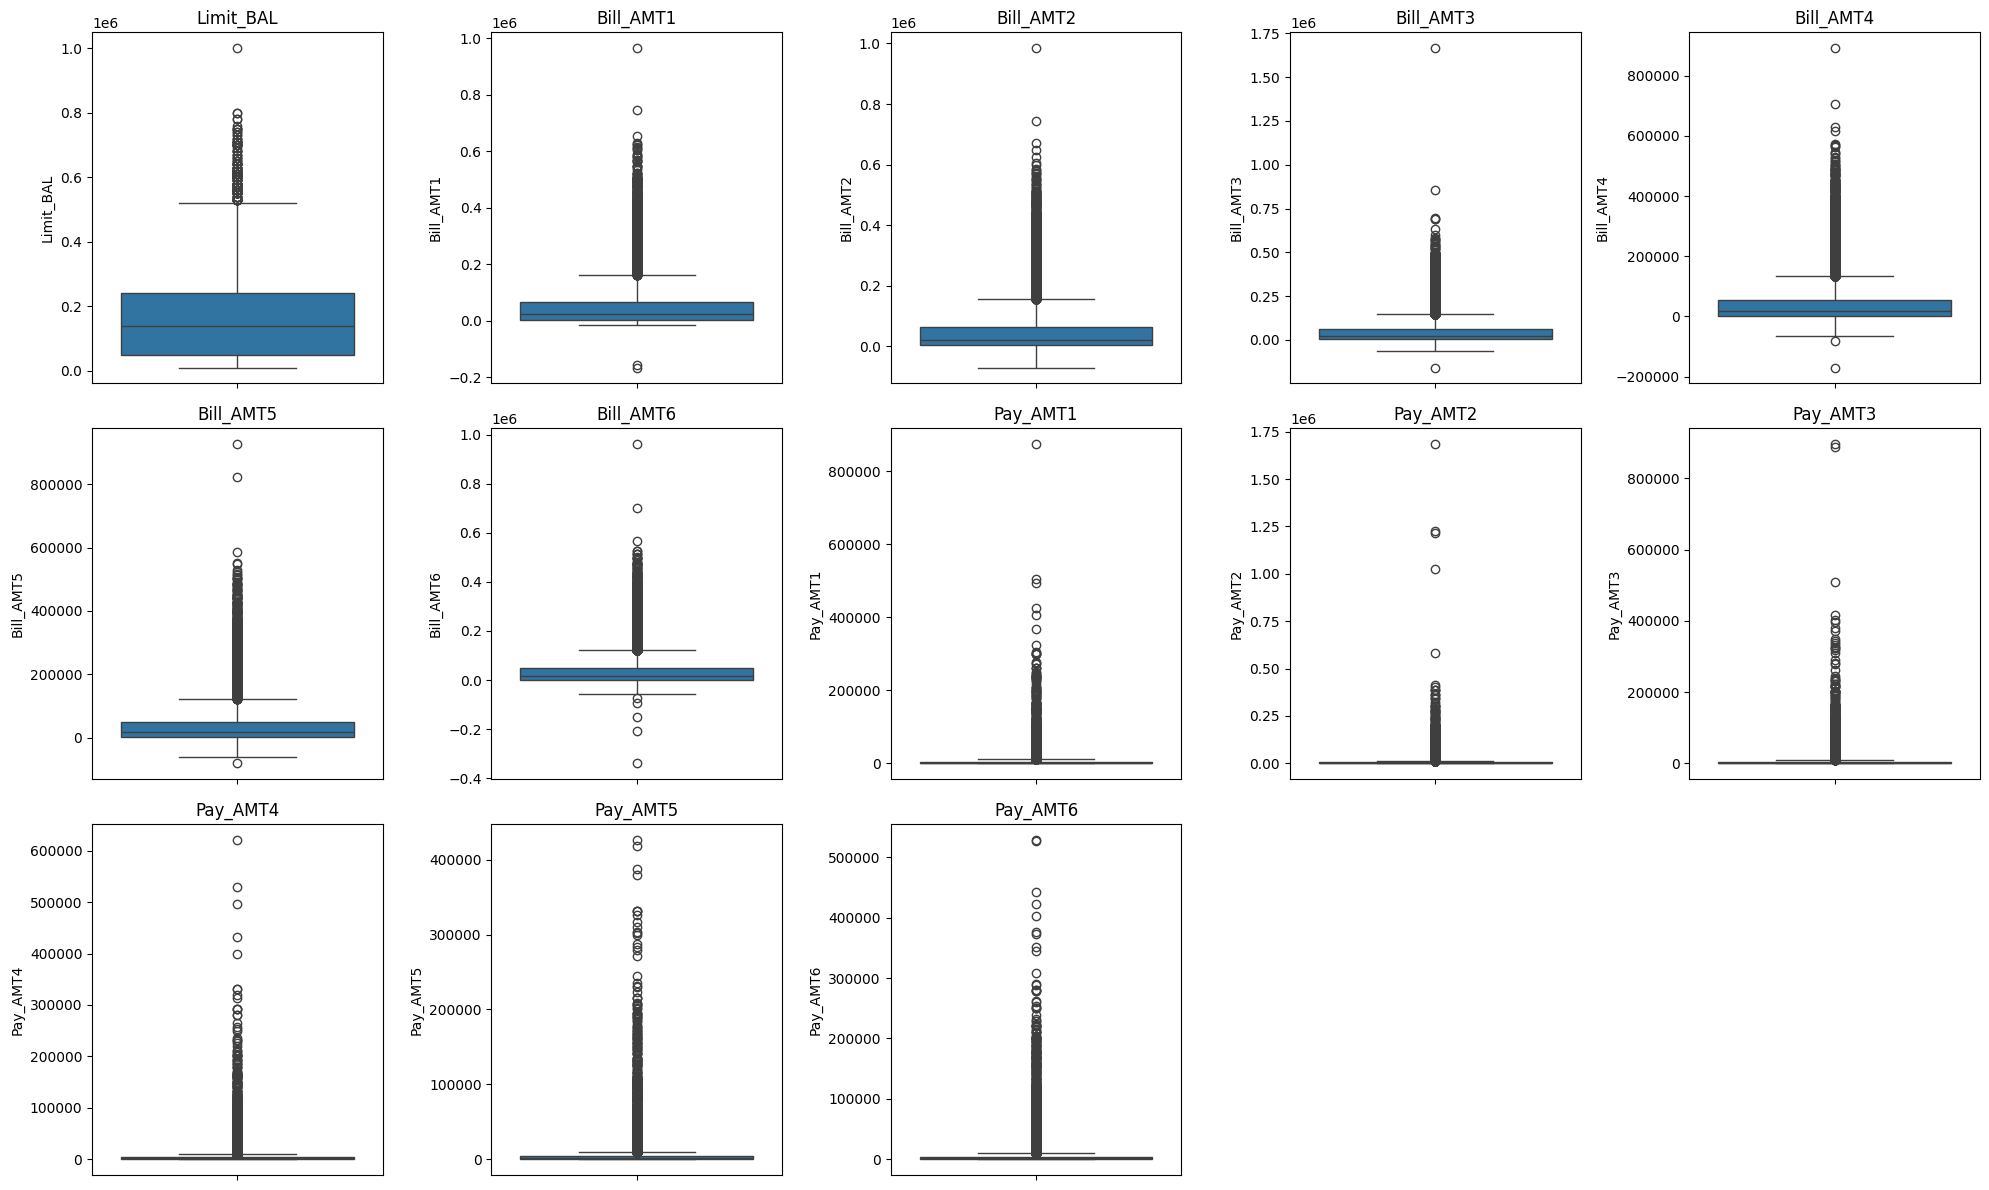

In [ ]:
fig, axes = plt.subplots(3, 5, figsize=(20, 12))  # 4 rows, 7 columns grid
axes = axes.ravel()


exclude_columns = ['Sex', 'Education', 'Marital_status', 'Age', 'Index', 'Y', "Pay_0", "Pay_1", "Pay_2", "Pay_3", "Pay_4", "Pay_5"]


columns_to_plot = [col for col in df.columns if col not in exclude_columns]


for i, col in enumerate(columns_to_plot):
    sns.boxplot(y=df[col], ax=axes[i])
    axes[i].set_title(col)
    axes[i].set_ylabel(col)
    axes[i].set_xlabel("")

# Hide any unused subplots if the grid has more spaces than needed
for j in range(len(columns_to_plot), len(axes)):
    axes[j].axis('off')  # Turn off unused axes

plt.tight_layout()
plt.show()

Extreme values are present in both bill amounts and payments, highlighting a need for careful handling during clustering.

# Data Normalization

In [ ]:
df_normalized = df.copy()

In [ ]:
df_normalized.drop(columns=['Index'], inplace=True)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_normalized[df_normalized.columns] = scaler.fit_transform(df_normalized[df_normalized.columns])



In [ ]:
df_normalized.head()

,Limit_BAL,Sex,Education,Marital_status,Age,Pay_0,Pay_1,Pay_2,Pay_3,Pay_4,...,Bill_AMT4,Bill_AMT5,Bill_AMT6,Pay_AMT1,Pay_AMT2,Pay_AMT3,Pay_AMT4,Pay_AMT5,Pay_AMT6,Y
1,-1.136377,0.810441,0.187091,-1.070083,-1.245239,1.794683,1.782197,-0.697299,-0.667250,-1.530779,...,-0.672841,-0.663455,-0.653139,-0.341854,-0.226997,-0.296596,-0.308036,-0.314197,-0.293448,1.874553
2,-0.366074,0.810441,0.187091,0.859419,-1.028293,-0.875707,1.782197,0.138566,0.188307,0.234386,...,-0.622021,-0.606671,-0.598425,-0.341854,-0.213510,-0.239844,-0.244263,-0.314197,-0.181057,1.874553
3,-0.597165,0.810441,0.187091,0.859419,-0.160510,0.014423,0.111311,0.138566,0.188307,0.234386,...,-0.450257,-0.417779,-0.392251,-0.250163,-0.191827,-0.239844,-0.244263,-0.248811,-0.012470,-0.533460
4,-0.905286,0.810441,0.187091,-1.070083,0.164909,0.014423,0.111311,0.138566,0.188307,0.234386,...,-0.233078,-0.187503,-0.157386,-0.221049,-0.169321,-0.228493,-0.237885,-0.244299,-0.237253,-0.533460
5,-0.905286,-1.233897,0.187091,-1.070083,2.334368,-0.875707,0.111311,-0.697299,0.188307,0.234386,...,-0.347609,-0.348784,-0.332151,-0.221049,1.333814,0.270926,0.265922,-0.269146,-0.255291,-0.533460


In [ ]:
df_normalized.describe()

,Limit_BAL,Sex,Education,Marital_status,Age,Pay_0,Pay_1,Pay_2,Pay_3,Pay_4,...,Bill_AMT4,Bill_AMT5,Bill_AMT6,Pay_AMT1,Pay_AMT2,Pay_AMT3,Pay_AMT4,Pay_AMT5,Pay_AMT6,Y
count,2.993200e+04,2.993200e+04,2.993200e+04,2.993200e+04,2.993200e+04,2.993200e+04,2.993200e+04,2.993200e+04,2.993200e+04,2.993200e+04,...,2.993200e+04,2.993200e+04,2.993200e+04,2.993200e+04,2.993200e+04,2.993200e+04,2.993200e+04,2.993200e+04,2.993200e+04,2.993200e+04
mean,5.697256e-17,1.519268e-16,-8.071112e-17,1.234405e-16,2.240921e-16,-1.519268e-17,5.317439e-17,3.323399e-17,-5.887164e-17,-7.596341e-18,...,-4.177987e-17,-3.560785e-17,-1.946562e-17,8.545883e-18,3.798170e-18,2.278902e-17,-1.139451e-17,-2.456942e-17,-5.934641e-18,-3.703216e-17
std,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,...,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00
min,-1.213407e+00,-1.233897e+00,-1.080452e+00,-1.070083e+00,-1.570658e+00,-1.765836e+00,-1.559576e+00,-1.533163e+00,-1.522806e+00,-1.530779e+00,...,-3.313216e+00,-2.000207e+00,-6.351154e+00,-3.418543e-01,-2.568755e-01,-2.965957e-01,-3.080357e-01,-3.141970e-01,-2.934482e-01,-5.334605e-01
25%,-9.052861e-01,-1.233897e+00,-1.080452e+00,-1.070083e+00,-8.113472e-01,-8.757066e-01,-7.241326e-01,-6.972985e-01,-6.672496e-01,-6.481963e-01,...,-6.365006e-01,-6.343189e-01,-6.319819e-01,-2.814518e-01,-2.206220e-01,-2.744624e-01,-2.890313e-01,-2.975236e-01,-2.865923e-01,-5.334605e-01
50%,-2.120134e-01,8.104406e-01,1.870909e-01,8.594188e-01,-1.605096e-01,1.442312e-02,1.113105e-01,1.385661e-01,1.883071e-01,2.343862e-01,...,-3.766760e-01,-3.655558e-01,-3.660349e-01,-2.150090e-01,-1.697109e-01,-1.944419e-01,-2.123760e-01,-2.161181e-01,-2.091548e-01,-5.334605e-01
75%,5.582896e-01,8.104406e-01,1.870909e-01,8.594188e-01,5.988009e-01,1.442312e-02,1.113105e-01,1.385661e-01,1.883071e-01,2.343862e-01,...,1.753916e-01,1.624790e-01,1.733715e-01,-3.947928e-02,-4.004809e-02,-4.079961e-02,-5.198658e-02,-5.002150e-02,-6.866576e-02,-5.334605e-01
max,6.412593e+00,8.104406e-01,5.257262e+00,2.788921e+00,4.720772e+00,7.135461e+00,6.794856e+00,6.825483e+00,7.032760e+00,7.295046e+00,...,1.317493e+01,1.457492e+01,1.548210e+01,5.242290e+01,7.278183e+01,5.055560e+01,3.929507e+01,2.757480e+01,2.941525e+01,1.874553e+00


In [ ]:
axes = axes.ravel()

for i, col in enumerate(["Pay_0", "Pay_1", "Pay_2", "Pay_3", "Pay_4", "Pay_5"]):
    sns.countplot(x=col, data=df_normalized, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')

plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

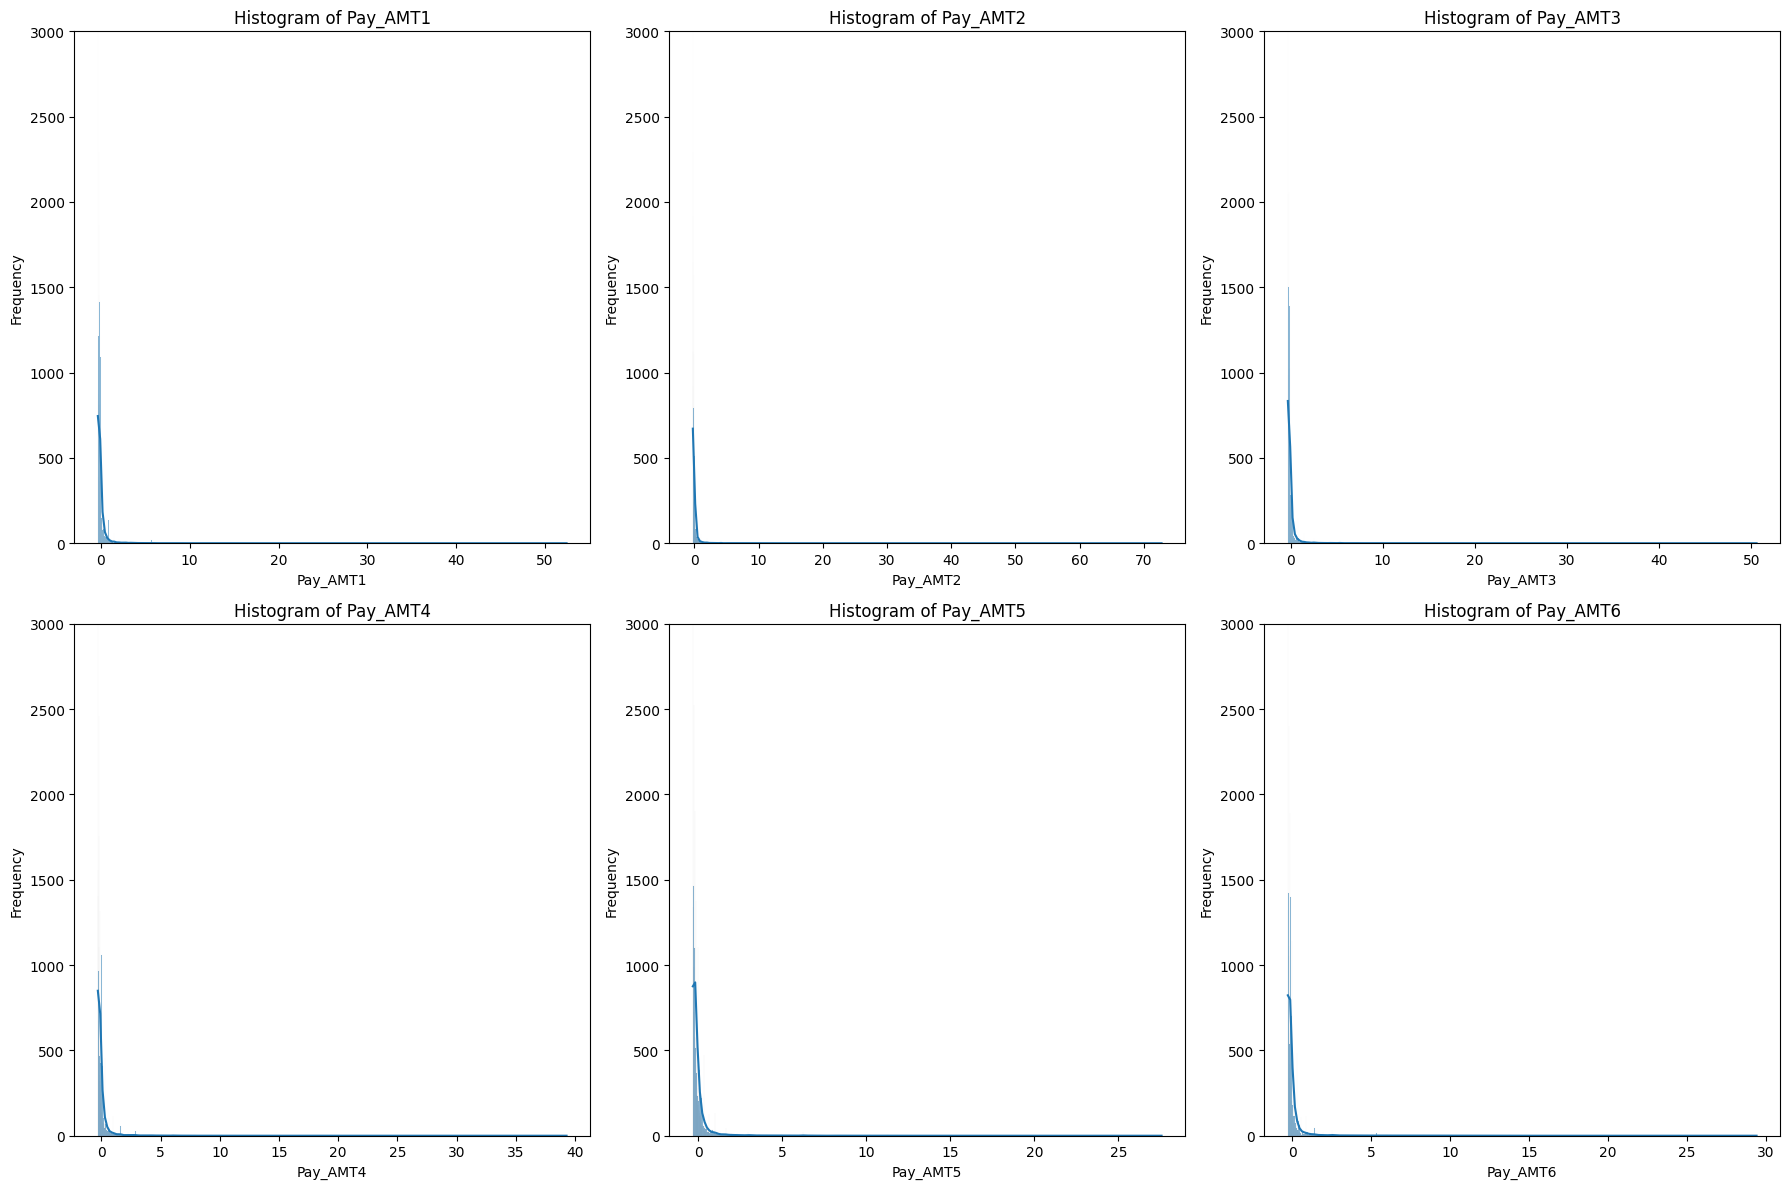

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.ravel()
y_limits = (0,3000)

for i, col in enumerate(["Pay_AMT1", "Pay_AMT2", "Pay_AMT3", "Pay_AMT4", "Pay_AMT5", "Pay_AMT6"]):
    sns.histplot(df_normalized[col], kde=True, ax=axes[i])
    axes[i].set_title(f'Histogram of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')
    axes[i].set_ylim(y_limits)


plt.tight_layout()
plt.show()

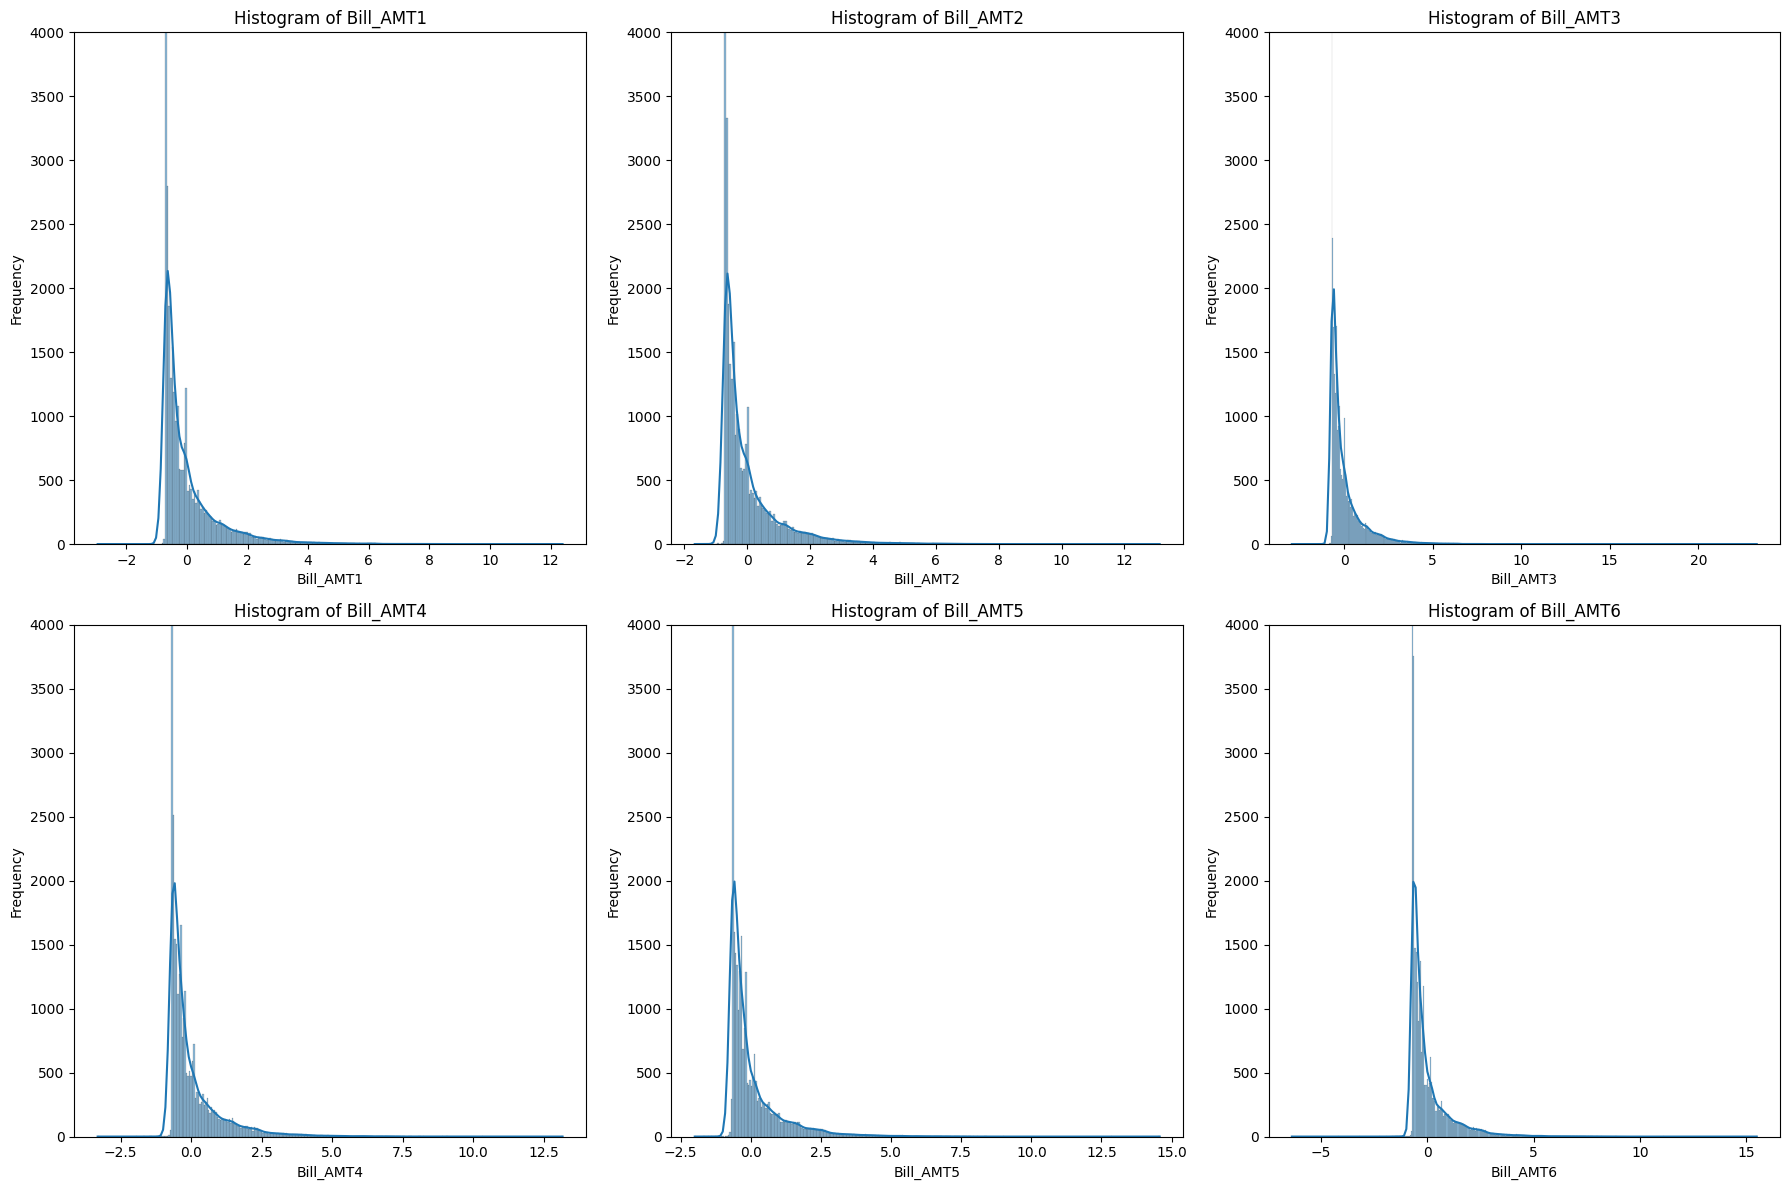

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.ravel()

y_limits = (0,4000)
for i, col in enumerate(["Bill_AMT1", "Bill_AMT2", "Bill_AMT3", "Bill_AMT4", "Bill_AMT5", "Bill_AMT6"]):
    sns.histplot(df_normalized[col], kde=True, ax=axes[i])
    axes[i].set_title(f'Histogram of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')
    axes[i].set_ylim(y_limits)


plt.tight_layout()
plt.show()

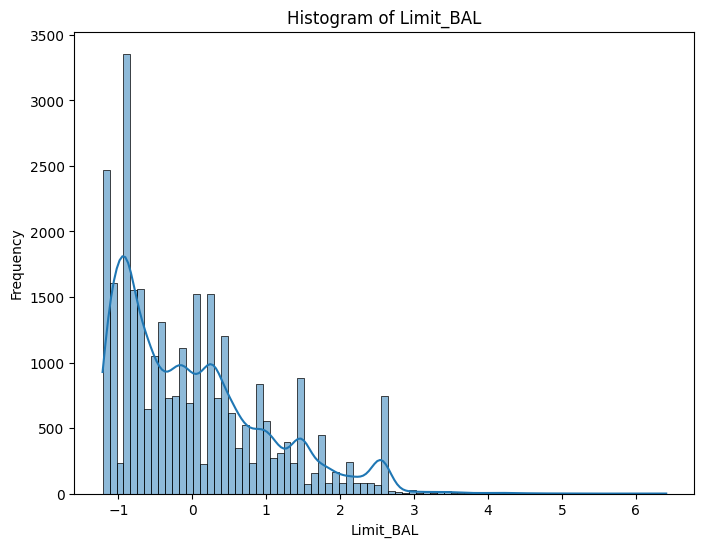

In [ ]:
    plt.figure(figsize=(8, 6))
    sns.histplot(df_normalized["Limit_BAL"], kde=True)
    plt.title(f'Histogram of {"Limit_BAL"}')
    plt.xlabel("Limit_BAL")
    plt.ylabel('Frequency')
    plt.show()

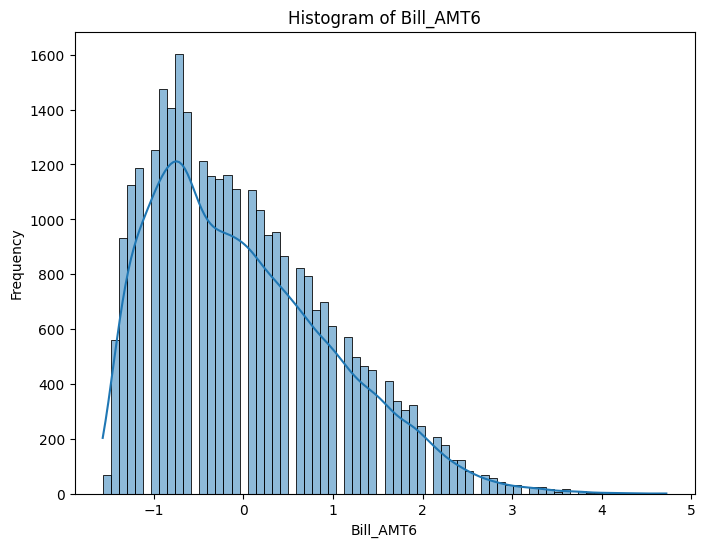

In [ ]:
    plt.figure(figsize=(8, 6))
    sns.histplot(df_normalized["Age"], kde=True)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

# Features Correlation

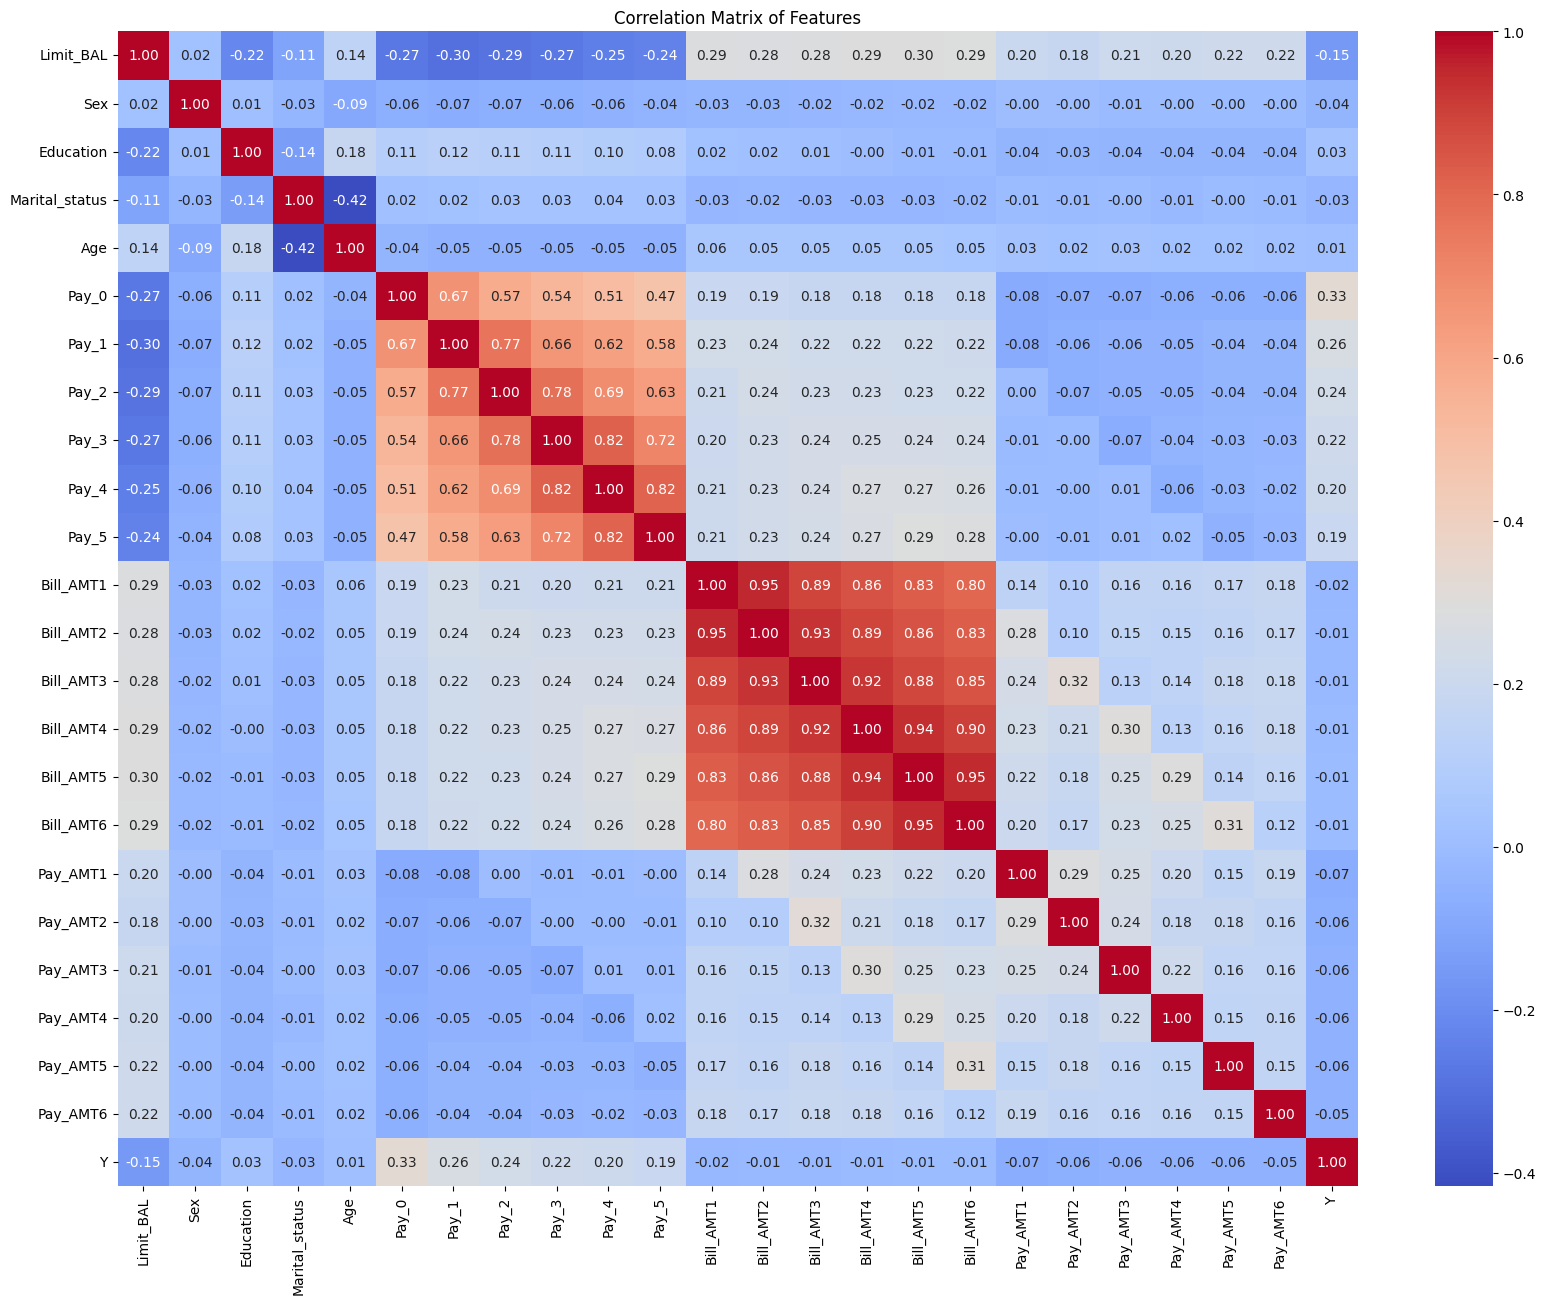

In [ ]:
plt.figure(figsize=(20, 15))
sns.heatmap(df_normalized.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Features")
plt.show()

There is no corrolation between our features ( only between Bill_AMT)

<Axes: >

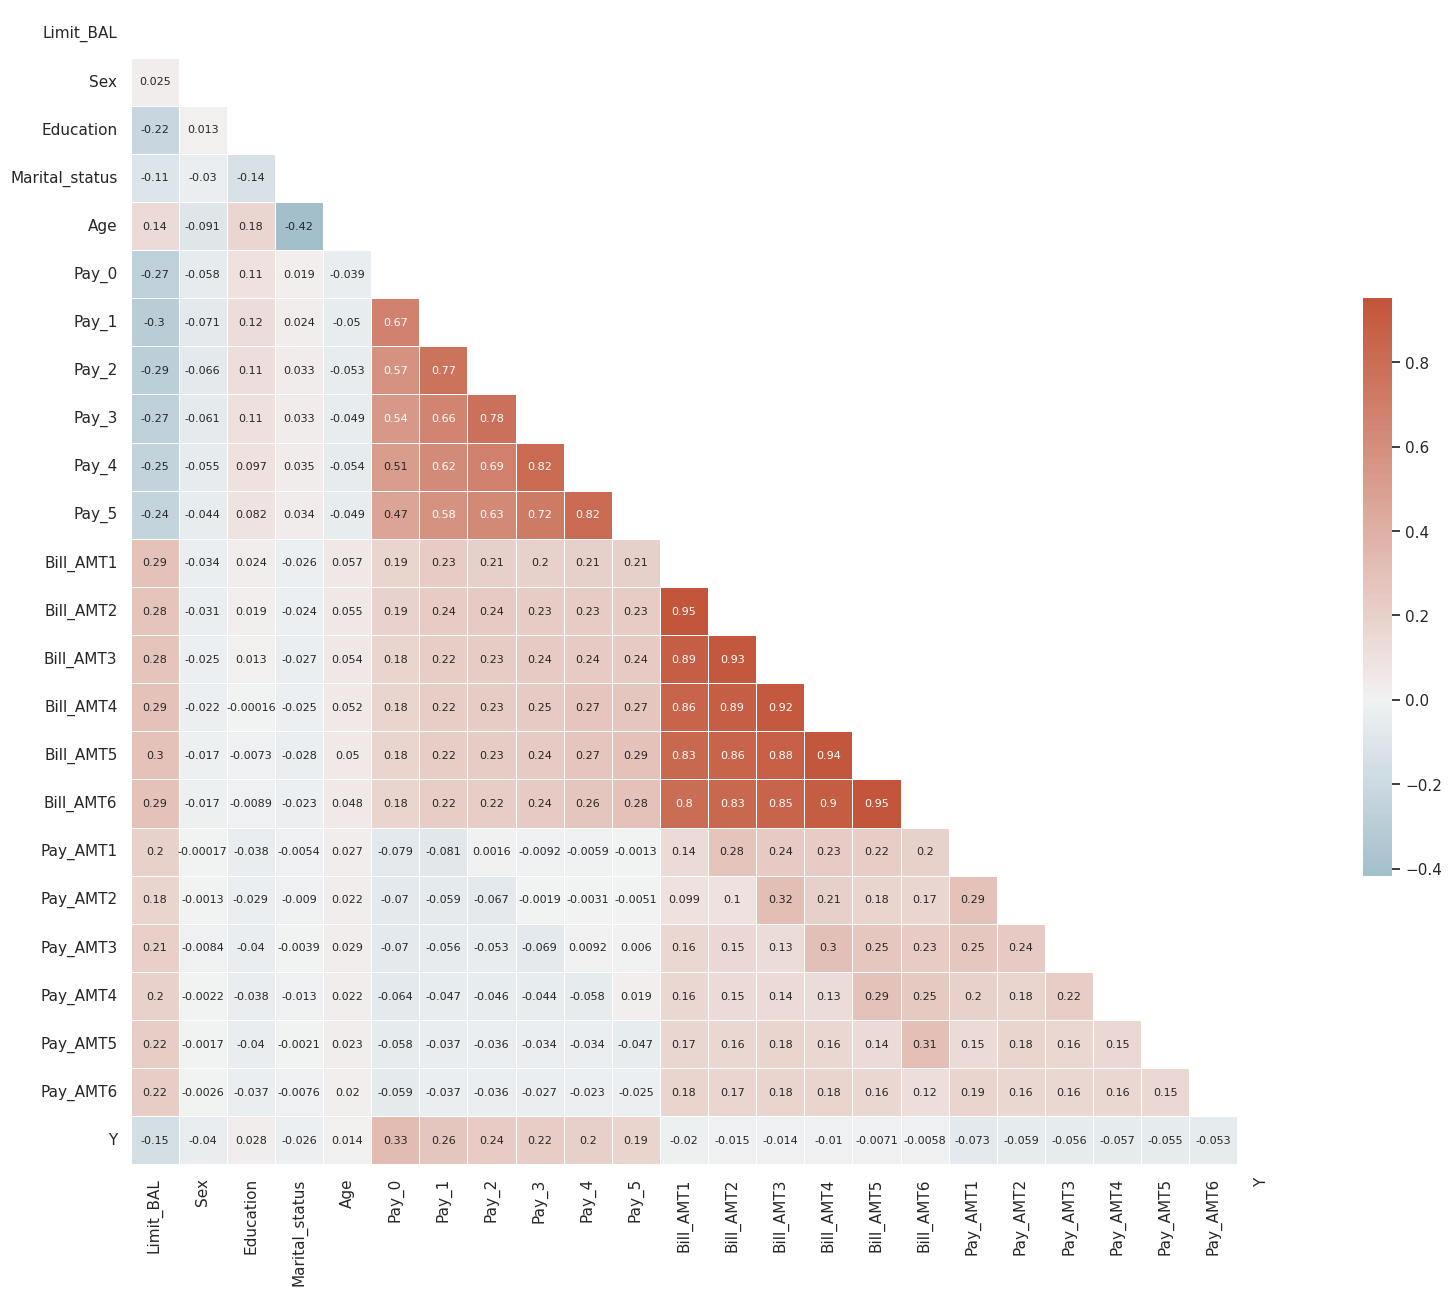

In [ ]:
sns.set_theme(style="white")

# Compute the correlation matrix
corr = df_normalized.corr()

# Generate a mask for the upper triangle (otherwise this looks like the square we had above and is redundant)
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 15))

# Generate a custom diverging colormap (choose colors here)
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, annot_kws={"fontsize":8})

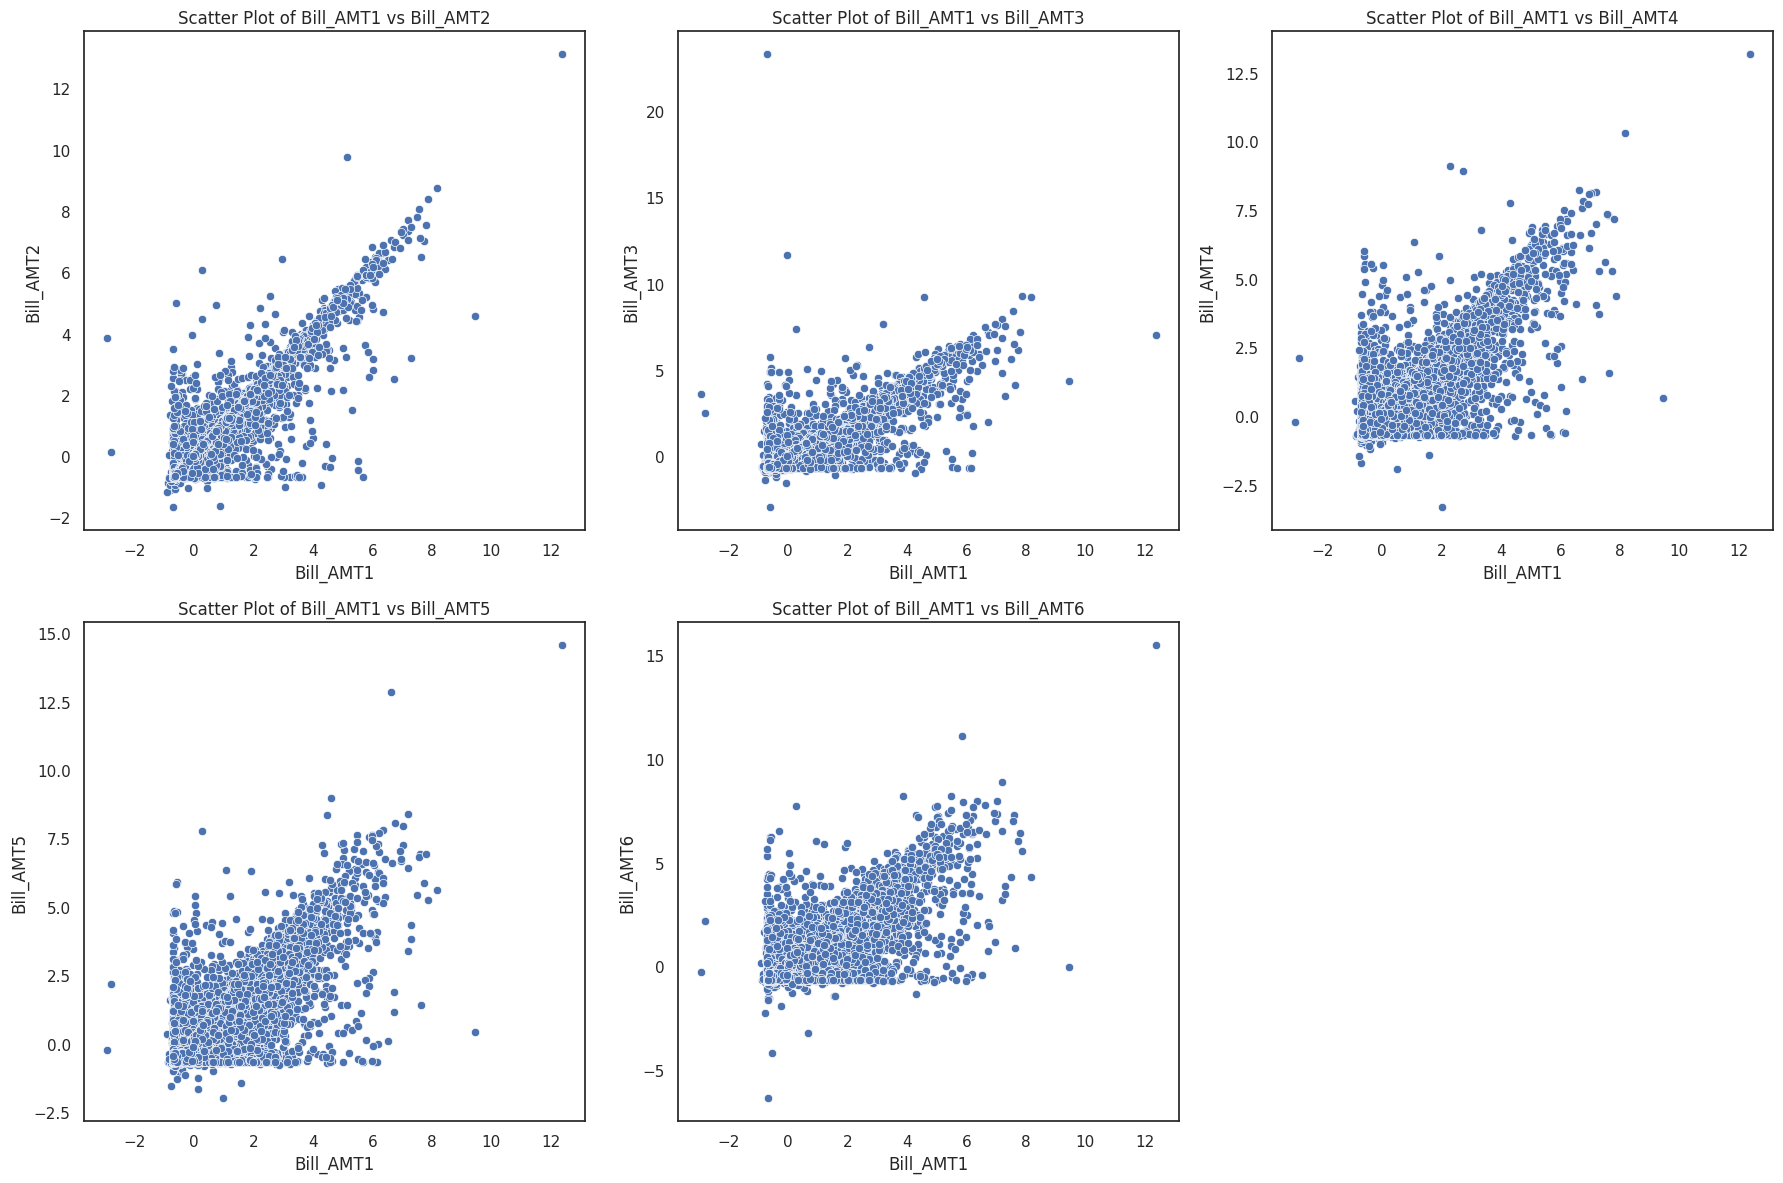

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(18, 12))  # Create a grid of subplots
axes = axes.ravel()  # Flatten the axes array for easy iteration

# Iterate over the columns to scatter plot against Bill_AMT1
for i, col in enumerate(["Bill_AMT2", "Bill_AMT3", "Bill_AMT4", "Bill_AMT5", "Bill_AMT6"]):
    sns.scatterplot(x=df_normalized["Bill_AMT1"], y=df_normalized[col], ax=axes[i])  # Scatter plot between Bill_AMT1 and the column
    axes[i].set_title(f'Scatter Plot of Bill_AMT1 vs {col}')
    axes[i].set_xlabel("Bill_AMT1")
    axes[i].set_ylabel(col)
# If there are unused subplots, turn them off
for j in range(len(["Bill_AMT2", "Bill_AMT3", "Bill_AMT4", "Bill_AMT5", "Bill_AMT6"]), len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

In [ ]:
df_normalized.to_csv('client_normalized.csv', index=False)

In [ ]:
from sklearn.cluster import KMeans

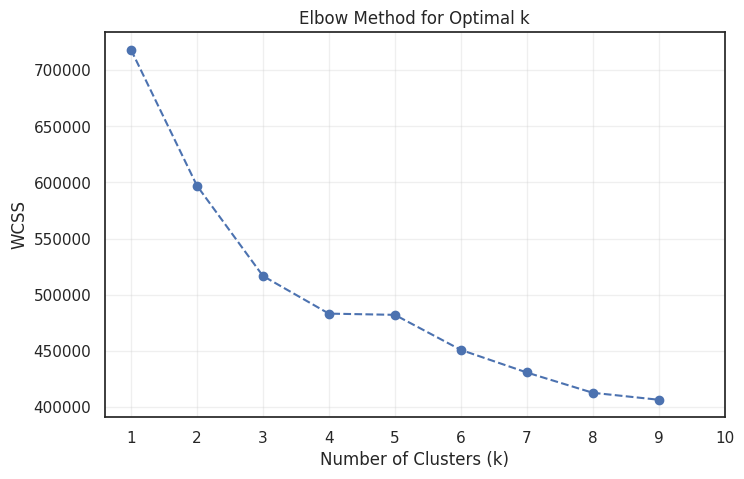

In [ ]:
wcss = []

# Test k values from 1 to 10
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_normalized)
    wcss.append(kmeans.inertia_)  # Inertia is the WCSS

# Plot the Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(range(1, 10), wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.xticks(range(1, 11))
plt.grid(alpha=0.3)
plt.show()

Based on the elbow method , our customers could be classified into 4-5 clusters.
In the next Notebook we are going to try different Clustering methods and test which is better for Creating Labels for our dataset